# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

In [3]:
import pandas as pd

In [4]:
load_data = pd.read_table("data/mini.csv",sep=",")

In [5]:
load_data.head(10)

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
5,b7586b82,4,4,17.274007,34.034189,21,8,74.371028,2,4,High,Basic,5,7,0
6,682ca511,8,23,10.629897,116.455949,12,10,58.708390,0,2,Low,Basic,0,6,1
7,8c948022,10,20,14.751713,67.821393,10,16,88.567777,3,5,Low,Premium,1,1,1
8,9e6713d2,20,4,12.624582,37.384210,8,8,63.624395,4,4,High,Basic,0,0,1
9,0eac44aa,22,8,10.545536,18.696273,5,10,57.646992,5,4,Medium,Basic,4,7,1


In [7]:
load_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [8]:
load_data.describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,26.998490,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,10.000000,7.000000,1.000000


In [9]:
load_data.describe(include="all")

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000
unique,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,8ddfd723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,Basic,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4992,5979,NaN,NaN,NaN
mean,NaN,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,NaN,NaN,2.010500,3.502900,0.619900
std,NaN,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,NaN,NaN,1.420983,2.311261,0.485435
min,NaN,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,NaN,NaN,1.000000,1.000000,0.000000
50%,NaN,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,NaN,NaN,2.000000,4.000000,1.000000
75%,NaN,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,NaN,NaN,3.000000,6.000000,1.000000


- 중복되는 user_id는 존재하지 않음 확인
- preferred_difficulty_level (선호 난이도) 는 총 3개의 레이블
- subscription_type (구독 유형) 은 총 2개의 레이블


## 가설 1 ) 서비스 사용 만족도가 높은 사용자일 수록 서비스 가입 기간이 길다

cf) data를 담아둔 변수명 = load_data

서비스 사용 만족도를 어떻게 파악하면 될까?


- user_id : 사용자의 고유 식별자
- subscription_duration : 사용자가 서비스에 가입한 기간 (월)
        최소:1개월 | 최대: 23개월 | 평균 가입 기간 : 약 12개월
        
- monthly_active_learning_days : 월간 활동적인 학습 일수
- total_completed_course : 완료한 총 코스 수
- recent_learning_achievement : 최근 학습 성취도
- community_engagement_level : 커뮤니티 참여도
- customer_inquire_history : 고객 문의 이력

In [14]:
h1 = load_data[["user_id","subscription_duration","monthly_active_learning_days","total_completed_courses","recent_learning_achievement","community_engagement_level","customer_inquiry_history"]]

In [15]:
h1

,user_id,subscription_duration,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,community_engagement_level,customer_inquiry_history
0,b919c29d,13,18,16,68.360455,4,4
1,a0a60abb,16,16,13,97.567322,3,1
2,b9f171ae,22,13,14,94.358763,4,0
3,5dc0ba8b,1,19,18,70.153228,3,1
4,65c83654,4,19,10,81.917908,4,3
...,...,...,...,...,...,...,...
9995,ae6b76bc,22,18,16,64.966803,5,1
9996,24588752,10,9,8,82.750244,3,2
9997,e4622a54,7,24,14,81.567839,5,1
9998,e07fbad9,11,10,10,89.885656,5,2


In [35]:
h1["customer_inquiry_history"].value_counts()

1     2668
2     2645
3     1851
0     1376
4      917
5      385
6      117
7       31
8        9
10       1
Name: customer_inquiry_history, dtype: int64

### 구독 기간 별 학생 수

In [43]:
# 구독 기간 별 학생 수
subscription_duration = h1.groupby("subscription_duration")["user_id"].count()
subscription_duration

subscription_duration
1     436
2     443
3     408
4     475
5     424
6     471
7     432
8     438
9     440
10    448
11    428
12    461
13    437
14    418
15    408
16    448
17    429
18    464
19    423
20    412
21    433
22    414
23    410
Name: user_id, dtype: int64

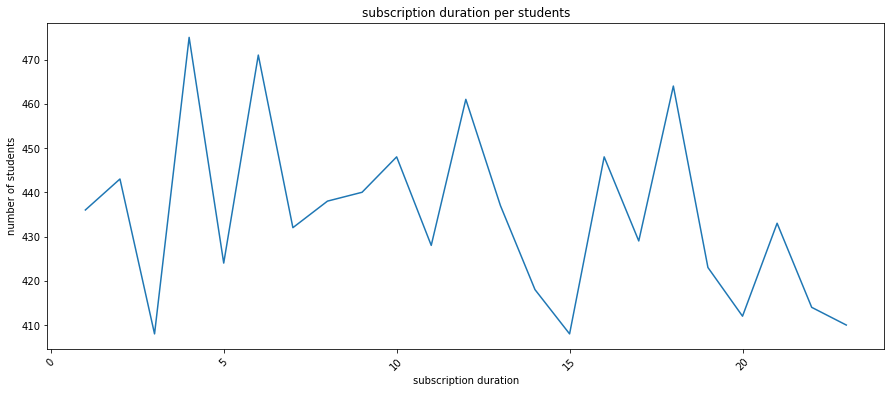

In [107]:
plt.figure(figsize=(15,6))

plt.plot(subscription_duration.index,subscription_duration.values)

plt.title("subscription duration per students")
plt.xlabel("subscription duration")
plt.ylabel("number of students")
plt.xticks(rotation=45)
plt.show()

In [105]:
type(subscription_duration.index)

pandas.core.indexes.numeric.Int64Index

### 고객 문의 횟수 별 학생 수

In [47]:
# 고객 문의 횟수 별 학생 수
customer_inquiry_history = h1.groupby("customer_inquiry_history")["user_id"].count()
customer_inquiry_history

customer_inquiry_history
0     1376
1     2668
2     2645
3     1851
4      917
5      385
6      117
7       31
8        9
10       1
Name: user_id, dtype: int64

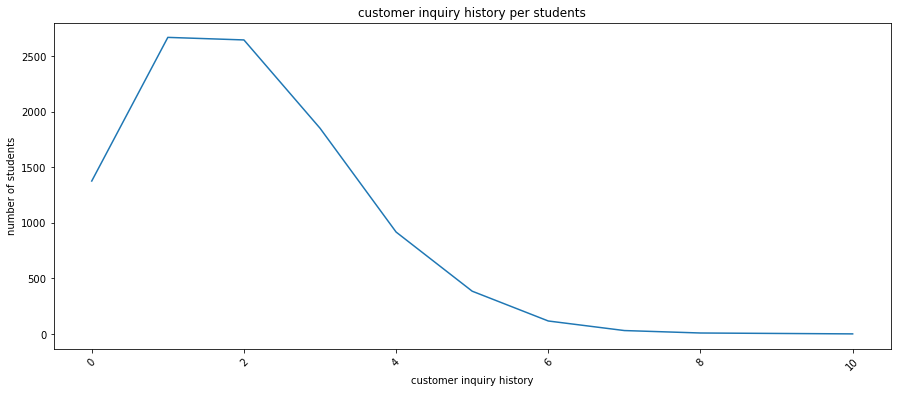

In [69]:
plt.figure(figsize=(15,6))
plt.plot(customer_inquiry_history.index,customer_inquiry_history.values)

plt.title("customer inquiry history per students")
plt.xlabel("customer inquiry history")
plt.ylabel("number of students")
plt.xticks(rotation=45)
plt.show()

## 구독 기간에 따른 데이터들의 평균 값

In [83]:
subscription_duration_group = h1.groupby("subscription_duration").mean()
subscription_duration_group

,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,community_engagement_level,customer_inquiry_history
subscription_duration,,,,,
1,11.933486,12.298165,75.373718,3.839450,2.084862
2,12.785553,11.939052,74.707304,3.839729,2.047404
3,12.252451,12.431373,75.077269,3.928922,1.997549
4,12.920000,12.269474,75.081559,3.892632,1.997895
5,12.266509,11.964623,74.150686,3.846698,2.035377
6,12.789809,12.125265,74.749463,3.868365,1.959660
7,13.081019,12.733796,74.824237,4.030093,2.002315
8,12.162100,12.340183,74.133601,3.892694,1.977169
9,12.481818,12.165909,75.383993,3.884091,2.120455


## 구독 기간 별 평균 학습 성취도

구독 기간에 따른 학생들의 평균 학습 성취도를 보면, 구독 기간이 상대적으로 길어질 수록 학습 성취도가 높아지는 것을 볼 수 있다. 특히 구독 기간이 10개월에서 13개월 사이의 사용자들의 평균 학습 성취도가 월등히 높은 것을 아래 그래프를 통해 파악할 수 있다.

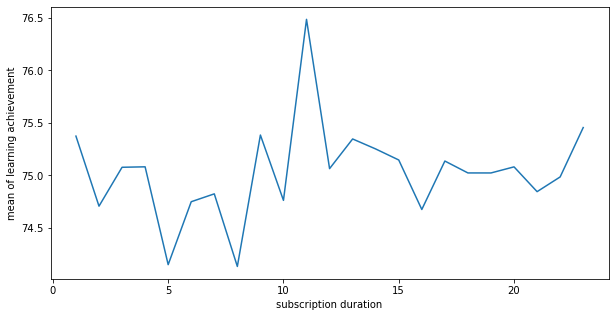

In [84]:
plt.figure(figsize=(10,5))

plt.plot(subscription_duration_group.index ,subscription_duration_group.recent_learning_achievement)
plt.title("")
plt.xlabel("subscription duration")
plt.ylabel("mean of learning achievement")
plt.show()

## 구독 요금제 별 사용자 수 파악

구독 요금제 유형은 Basic, Preminum 총 두 가지가 존재
데이터를 조회해 본 결과, Basic 요금제 사용자는 5979명, Premium 요금제 사용자는 4021명으로, Basic 요금제 사용자가 더 많음을 파악할 수 있다.

In [99]:
subscription_type_group = load_data.groupby("subscription_type")["user_id"].count()
subscription_type_group

subscription_type
Basic      5979
Premium    4021
Name: user_id, dtype: int64

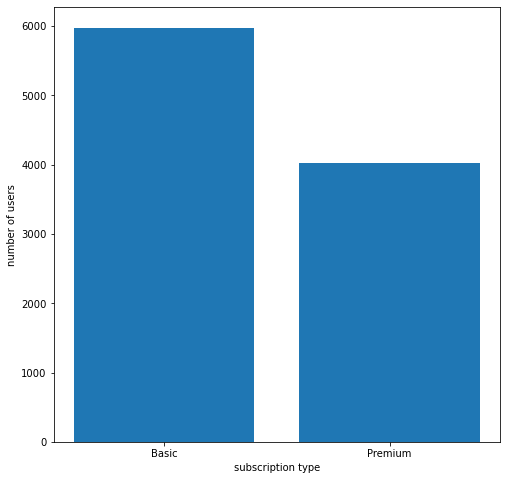

In [100]:
plt.figure(figsize=(8,8))

plt.bar(subscription_type_group.index ,subscription_type_group.values)
plt.title("")
plt.xlabel("subscription type")
plt.ylabel("number of users")
plt.show()

## 월간 활동적인 학습 일수 데이터 조회

월간 활동적인 학습 일수 중 가장 많은 사용자가 존재하는 일수 : 24 일(회)

In [108]:
load_data["monthly_active_learning_days"].unique()

array([18, 16, 13, 19, 21, 12, 10,  8,  5,  9, 20, 24, 14, 23, 22,  1,  2,
        3, 17, 15,  7,  4,  6, 11], dtype=int64)

In [110]:
monthly_active_learning_d_group = load_data.groupby("monthly_active_learning_days")["user_id"].count()
monthly_active_learning_d_group

monthly_active_learning_days
1     395
2     397
3     412
4     446
5     423
6     406
7     422
8     452
9     415
10    435
11    368
12    423
13    398
14    414
15    420
16    389
17    433
18    401
19    428
20    447
21    416
22    405
23    396
24    459
Name: user_id, dtype: int64

In [130]:
monthly_active_learning_d_group.min() # 11일

368

In [131]:
monthly_active_learning_d_group.max() # 24일

459

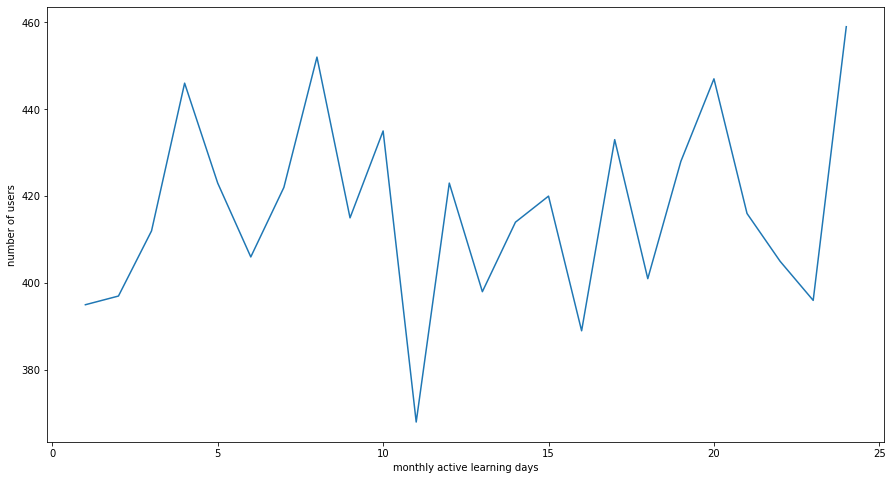

In [112]:
plt.figure(figsize=(15,8))

plt.plot(monthly_active_learning_d_group.index ,monthly_active_learning_d_group.values)
plt.title("")
plt.xlabel("monthly active learning days")
plt.ylabel("number of users")
plt.show()

In [132]:
# 월간 활동적인 학습 일수가 24일에 해당하는 사람들의 데이터만 모아보기 (459명)
user_segment24 = load_data[load_data["monthly_active_learning_days"]==24]
user_segment24

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
15,4716e6cb,7,22,9.743147,79.121685,24,13,91.066801,2,3,Low,Basic,3,6,0
55,d75c5c11,9,27,19.392880,183.470916,24,12,42.870248,4,5,Medium,Premium,1,4,1
75,5b2d2885,13,22,20.487263,17.682068,24,11,82.657829,4,3,Low,Basic,1,5,1
77,23cf2690,21,1,18.515646,25.310980,24,12,86.355914,2,5,Low,Basic,0,0,1
95,3c3496a0,22,3,13.066075,14.356539,24,15,83.085495,5,2,High,Basic,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9832,c9b03e08,21,15,15.728651,85.667285,24,17,69.128609,1,2,Low,Basic,1,7,1
9850,bd80f67b,13,2,10.888154,83.289770,24,12,75.209363,3,5,Medium,Premium,1,5,0
9948,dfc02de1,8,13,18.584108,82.585177,24,13,97.550118,2,3,High,Premium,1,6,1
9984,6831807d,10,20,14.032918,3.833025,24,13,76.616995,3,2,Medium,Basic,0,3,1


In [133]:
# 월간 활동적인 학습 일수가 11일에 해당하는 사람들의 데이터만 모아보기 (368명)
user_segment11 = load_data[load_data["monthly_active_learning_days"]==11]
user_segment11

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
83,0637e375,21,20,13.441688,5.263719,11,9,76.663405,1,5,Medium,Basic,1,7,0
88,0829d342,9,27,10.669636,12.547500,11,11,55.592185,4,5,Low,Basic,5,3,0
106,e2da519f,19,11,15.751428,36.244055,11,13,62.246943,5,2,Medium,Basic,2,7,1
157,d391bf9e,12,6,15.543454,0.305197,11,13,89.195749,0,2,Low,Basic,2,5,0
188,22700776,5,18,16.222271,52.871917,11,14,82.427921,4,4,Medium,Basic,4,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,4ddde6d3,2,24,11.412968,28.240429,11,5,74.208750,2,3,High,Basic,2,5,1
9969,1aad9084,11,19,16.515601,137.430127,11,11,79.822459,2,2,Low,Basic,3,0,0
9972,520abce7,19,26,13.540519,25.269974,11,13,74.578855,2,5,Low,Premium,2,1,1
9981,3c87381d,7,6,10.832999,53.166318,11,21,73.358599,0,5,Low,Premium,4,2,1


In [136]:
completed_courses_24 = user_segment24.groupby("total_completed_courses")["user_id"].count()
completed_courses_24

total_completed_courses
3      3
4      3
5      4
6     10
7     19
8     33
9     29
10    48
11    49
12    40
13    53
14    53
15    28
16    21
17    27
18    14
19    11
20     3
21     4
22     4
23     1
24     1
25     1
Name: user_id, dtype: int64

In [137]:
completed_courses_11 = user_segment11.groupby("total_completed_courses")["user_id"].count()
completed_courses_11

total_completed_courses
2      1
3      1
4      2
5      7
6      4
7     16
8     15
9     36
10    39
11    50
12    29
13    47
14    34
15    28
16    15
17    15
18    10
19     3
20     7
21     5
22     2
23     1
27     1
Name: user_id, dtype: int64

### 한달에 가장 많이 수업을 수강하는 학생 (24회)과 가장 적게 수업을 수강하는 학생 (11회) 완료한 총 코스 수 비교

한달에 가장 많이 수업을 수강하는 학생 (24회)가 상대적으로 11회 수강하는 학생 보다 완료한 총 코스 수가 더 많다.

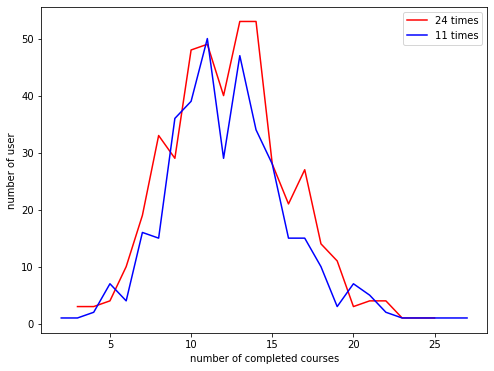

In [140]:
#그래프 크기 설정 (인치)
plt.figure(figsize=(8,6))

#x축 y축 설정을 동일하게 해주고, color와, label을 추가 해주시면 됩니다. 참 쉽죠?

#app개발 수강생 관심 분야
plt.plot(completed_courses_24.index,completed_courses_24.values, color="red", label="24 times")
#AI기획 수강생 관심 분야
plt.plot(completed_courses_11.index, completed_courses_11.values, color="blue", label="11 times")


#각 그래프의 범례는 .legend()을 이용하여 만들어 줍니다! :)
plt.legend()

#그래프 타이틀
plt.title("")
#x축 레이블
plt.xlabel('number of completed courses')
#y축 레이블
plt.ylabel('number of user')

#그래프 보여주기
plt.show()

In [147]:
achievement24 = user_segment24["recent_learning_achievement"]
achievement24.mean()

76.0523241744255

In [148]:
achievement11 = user_segment11["recent_learning_achievement"]
achievement11.mean()

74.50114794239177

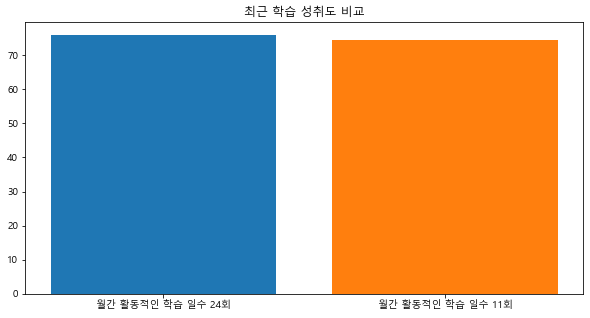

In [158]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
        
plt.figure(figsize=(10,5))

plt.bar("월간 활동적인 학습 일수 24회",achievement24.mean())
plt.bar("월간 활동적인 학습 일수 11회",achievement11.mean())

plt.title('최근 학습 성취도 비교')

#x축 레이블
plt.xlabel('')

#y축 레이블
plt.ylabel('')

#그래프 보여주기
plt.show()